## import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [2]:
pip install -U ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3348875d109dcd7d9f04ba6109d1e11fc637fb069f11d82d478de02137140866
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [3]:
from ydata_profiling import ProfileReport

In [4]:
from sklearn import linear_model

## dataset & nettoyage:

In [8]:
data=pd.read_csv("diamonds.csv", sep=';')

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
#del data['Unnamed: 0']
#suppression de la colonne inutile

In [11]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
data.info()
#vérification du type de valeurs et des valeurs manquantes, tout à l'air ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Analyse univariée des variables: 


*   variables explicatives: carat & depth
*   variables expliquée: price


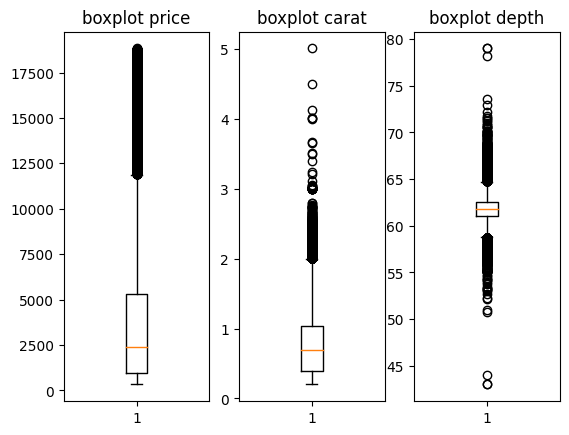

In [13]:
plt.subplot(1, 3, 1)
plt.boxplot(data['price'])
plt.title("boxplot price")
plt.subplot(1, 3, 2)
plt.boxplot(data['carat'])
plt.title("boxplot carat")
plt.subplot(1, 3, 3)
plt.boxplot(data['depth'])
plt.title("boxplot depth")
plt.show()

In [14]:
data[['price','carat','depth']].describe()

,price,carat,depth
count,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749405
std,3989.439738,0.474011,1.432621
min,326.000000,0.200000,43.000000
25%,950.000000,0.400000,61.000000
50%,2401.000000,0.700000,61.800000
75%,5324.250000,1.040000,62.500000
max,18823.000000,5.010000,79.000000


On peut voir qu'il y'a beaucoup de valeurs abhérentes pour chacune de nos variables étudiées, mais ceci pourrait etre expliquables de part le fait que un grand nombre de carat, qui est assez rare, entraine un prix très élevé.

Le prix moyen d'un diamant est de 3989€, la médiane étant de 2401€,l'ecart entre les deux pourrait etre du au fait qu'il existe pas mal de valeurs abhérentes qui font monter la moyenne malgré le fait que la plupart des valeurs soient inférieures ou supérieures à 2401€.

Concernant les variables explicatives, rien n'as l'air d'etre anormal, nous avons des moyennes et médianes similaires, meme s'il existe des valeurs abhérentes

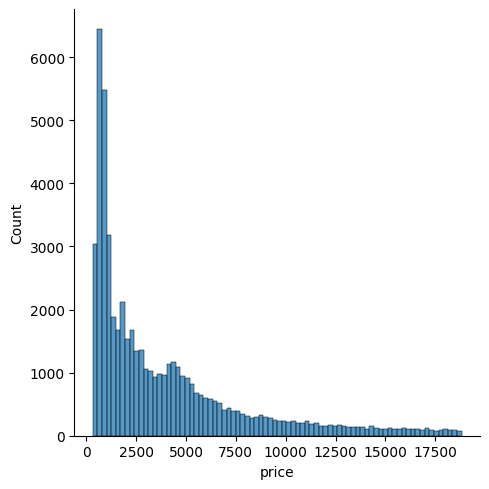

In [15]:
sn.displot(data, x="price")

comme on peut le voir ici, les valeurs du prix sont skewed a gauche, ce qui veut dire qu'il existe plus de diamants à'bas' prix que de diamnts à prix plus élevés, ce qui est logique

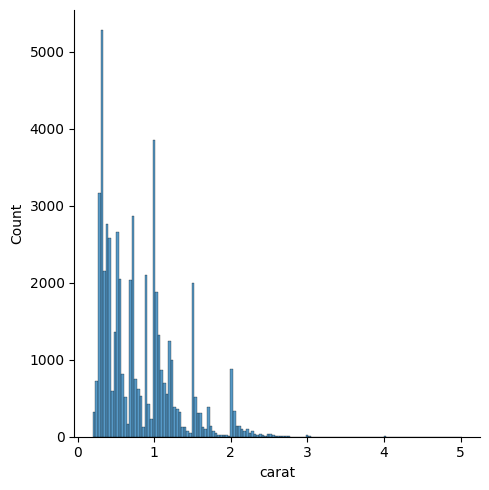

In [16]:
sn.displot(data, x="carat")

comme on peut le voir ici, les valeurs du carat sont skewed a gauche, ce qui veut dire qu'il existe plus de diamants à carats bas qu'à carats élevés.

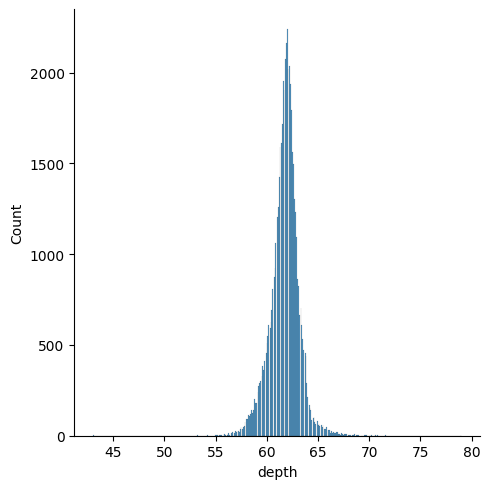

In [17]:
sn.displot(data, x="depth")

il n'y a pas l'air d'y avoir de skewness en particulier, mais concernant les données, on voit qu'elles se resserent autour de 62, ça ce confirme donc par l'ecart type de 0.47 qui est très bas

## Analyse bivariée

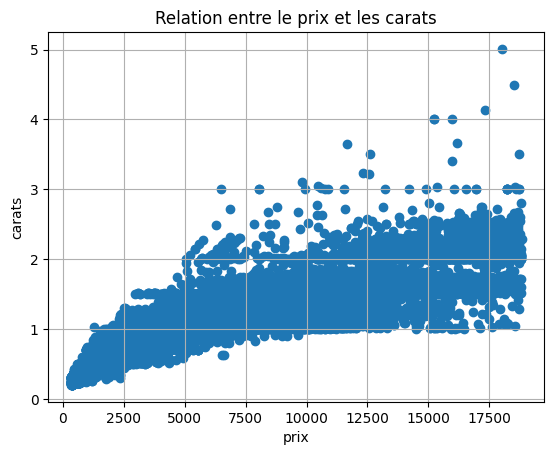

In [18]:
plt.scatter(data['price'],data['carat'])
plt.xlabel('prix')
plt.ylabel('carats')
plt.title("Relation entre le prix et les carats")
plt.grid()
plt.rcParams["figure.figsize"] = (20,11)
plt.show()

il y l'air d'exister une covariance positive ainsi qu'une corrélation positive entre les carats et le prix.

In [19]:
print('covariance de carats et prix:',np.cov(data['price'],data['carat'])[0][1])
print('corrélation entre les carats et le prix:',np.corrcoef(data['price'],data['carat'])[0][1])

covariance de carats et prix: 1742.7653642651187
corrélation entre les carats et le prix: 0.921591301193477


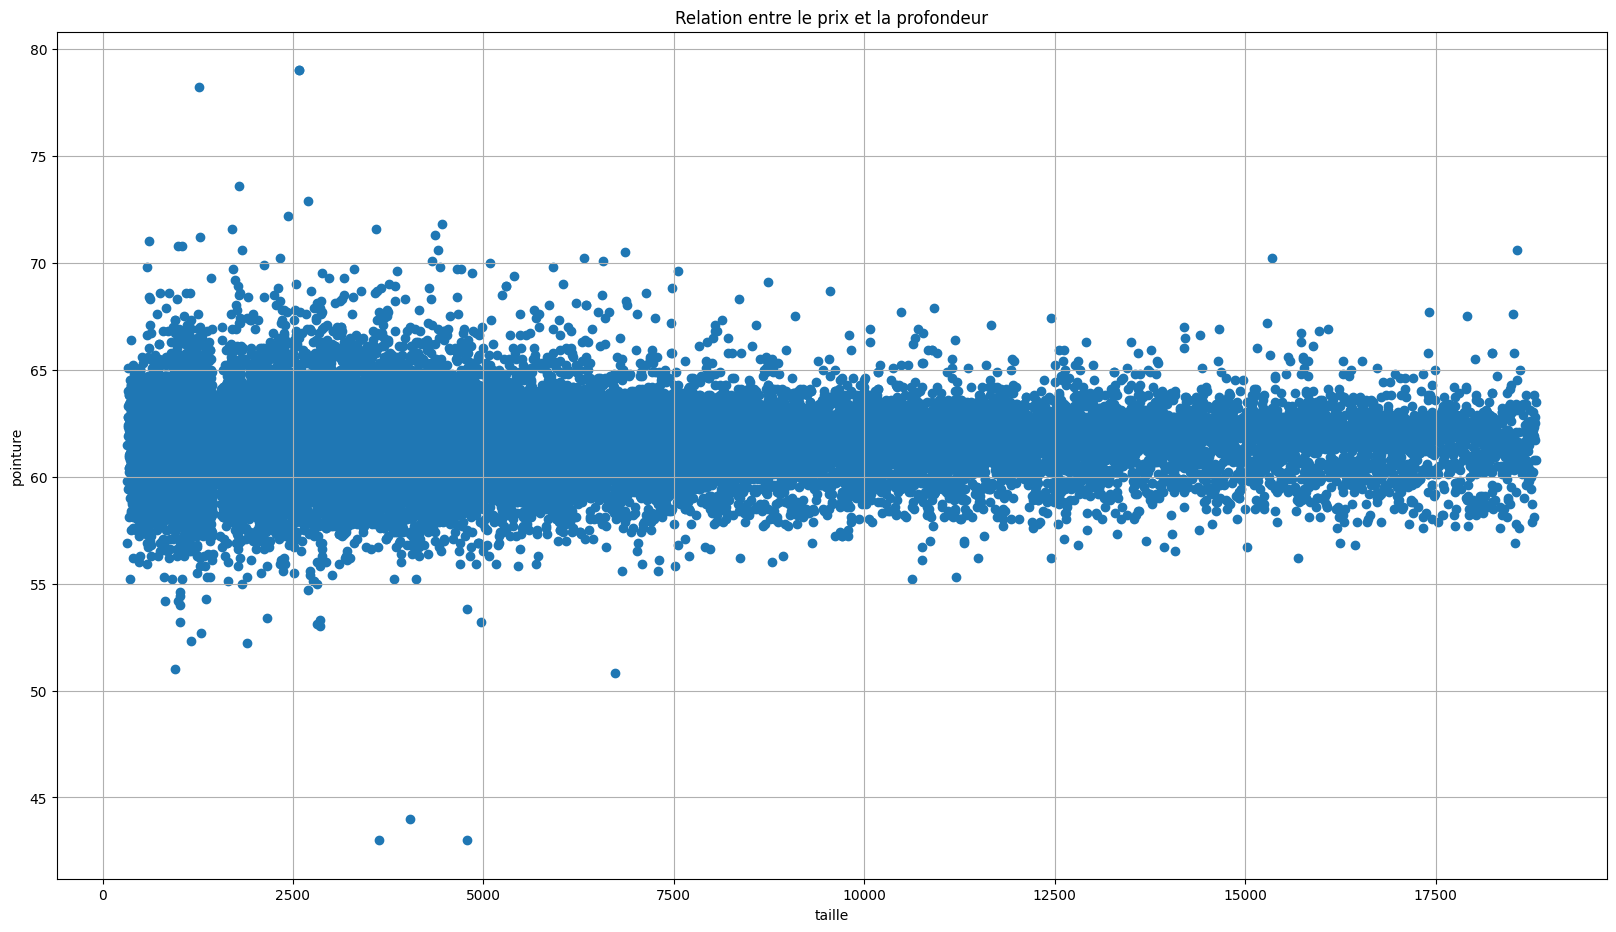

In [20]:
plt.scatter(data['price'],data['depth'])
plt.xlabel('taille')
plt.ylabel('pointure')
plt.title("Relation entre le prix et la profondeur")
plt.grid()
plt.rcParams["figure.figsize"] = (20,11)
plt.show()

il n'y a pas l'air d'exister une corrélation entre la profondeur et le prix.

In [21]:
print('covariance de carats et prix:',np.cov(data['price'],data['depth'])[0][1])
print('corrélation entre les carats et le prix:',np.corrcoef(data['price'],data['depth'])[0][1])

covariance de carats et prix: -60.8537121364241
corrélation entre les carats et le prix: -0.010647404584142968


## prédiction & évaluation du modèle:

In [22]:
X = data[['depth', 'carat']]
y = data['price']

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [24]:
pred=[]
for n,m in zip(data['depth'],data['carat']):
  val=regr.predict([[n, m]])
  pred.append(val)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.p

In [25]:
pred1=[]
for i in pred:
  pred1.append(i.item())

In [26]:
r2_score(list(data['price']), pred1) 

0.8506754571636564

In [27]:
MSE=mse(list(data['price']),pred1)
RMSE=MSE**0.5
RMSE

1541.6063141344937

l'erreur moyenne du prix est de 1540€ ce qui peut etre considérée comme une grosse erreur malgré le bon R2 score

## Autre méthode d'analyse:

In [28]:
profile=ProfileReport(data,title='Profiling Report')
profile

Output hidden; open in https://colab.research.google.com to view.